# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# creating url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [7]:
# testing the url
response = requests.get(url + "irvine")
data = response.json()
print(json.dumps(data, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 33.69,
        "lon": -117.83
    },
    "dt": 1536642540,
    "id": 5359777,
    "main": {
        "humidity": 78,
        "pressure": 1011,
        "temp": 67.86,
        "temp_max": 69.98,
        "temp_min": 64.04
    },
    "name": "Irvine",
    "sys": {
        "country": "US",
        "id": 485,
        "message": 0.0049,
        "sunrise": 1536672732,
        "sunset": 1536717770,
        "type": 1
    },
    "visibility": 16093,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 4.7
    }
}


In [8]:
# loop through city and pull api calls.

# create lists for information
city_list = []
country_list = []
weather_data = []
lat_data = []
lng_data = []
temp_data = []
humid_data = []
cloud_data = []
wind_data = []
date_data = []

record_count = 1


# divide data into 13 sets 
set = 1
city_sets = 13
groups = int(len(cities)/city_sets)

# loop through list and record weather data
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(url + city)
        city_weather = response.json()
        weather_data.append(city_weather)
        
        city_list.append(city_weather['name'])
        country_list.append(city_weather['sys']['country'])
        lat_data.append(city_weather["coord"]["lat"])
        lng_data.append(city_weather["coord"]["lon"])
        temp_data.append(city_weather["main"]["temp"]) 
        humid_data.append(city_weather["main"]["humidity"]) 
        cloud_data.append(city_weather["clouds"]["all"])
        wind_data.append(city_weather["wind"]["speed"]) 
        date_data.append(city_weather["dt"])
        print(f"Processing Record {record_count} of Set {set} | {city}")
        record_count += 1
        if record_count == groups:
            record_count = 1
            set += 1
    except:
        print("City not found. Skipping...")
          
print("---------------------------------------")
print("Data Retrieval Complete ")
print("---------------------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | komsomolskiy
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | popondetta
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | antofagasta
Processing Record 9 of Set 1 | dalvik
Processing Record 10 of Set 1 | sao joao da barra
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | muros
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | sinnamary
Processing Record 17 of Set 1 | maningrida
Processing Record 18 of Set 1 | camalu
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | namatanai
City not found. Skipping...
Processing Record 22 of Set 1 | n

Processing Record 13 of Set 5 | schneeberg
Processing Record 14 of Set 5 | fort nelson
City not found. Skipping...
Processing Record 15 of Set 5 | ambon
Processing Record 16 of Set 5 | cuilapa
Processing Record 17 of Set 5 | georgetown
Processing Record 18 of Set 5 | voskresenskoye
Processing Record 19 of Set 5 | outlook
Processing Record 20 of Set 5 | rongcheng
Processing Record 21 of Set 5 | macau
Processing Record 22 of Set 5 | meulaboh
Processing Record 23 of Set 5 | egvekinot
Processing Record 24 of Set 5 | koulikoro
Processing Record 25 of Set 5 | la ronge
City not found. Skipping...
Processing Record 26 of Set 5 | vestmanna
Processing Record 27 of Set 5 | kaitangata
Processing Record 28 of Set 5 | colwyn bay
Processing Record 29 of Set 5 | upernavik
Processing Record 30 of Set 5 | petukhovo
Processing Record 31 of Set 5 | klaksvik
Processing Record 32 of Set 5 | mahebourg
Processing Record 33 of Set 5 | talnakh
Processing Record 34 of Set 5 | lebu
Processing Record 35 of Set 5 |

Processing Record 25 of Set 9 | turukhansk
Processing Record 26 of Set 9 | hofn
Processing Record 27 of Set 9 | oistins
Processing Record 28 of Set 9 | yashkul
Processing Record 29 of Set 9 | tanete
Processing Record 30 of Set 9 | kununurra
Processing Record 31 of Set 9 | teya
Processing Record 32 of Set 9 | saint-pierre
Processing Record 33 of Set 9 | wanganui
Processing Record 34 of Set 9 | taoudenni
Processing Record 35 of Set 9 | flinders
Processing Record 36 of Set 9 | abu samrah
Processing Record 37 of Set 9 | grindavik
Processing Record 38 of Set 9 | shubarshi
Processing Record 39 of Set 9 | sao felix do xingu
Processing Record 40 of Set 9 | sao filipe
City not found. Skipping...
Processing Record 41 of Set 9 | bonthe
Processing Record 42 of Set 9 | satara
Processing Record 43 of Set 9 | luena
City not found. Skipping...
Processing Record 44 of Set 9 | douentza
Processing Record 1 of Set 10 | daru
Processing Record 2 of Set 10 | toronto
Processing Record 3 of Set 10 | matay
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create data frame
weather_status = pd.DataFrame({"City":city_list,
                            "Country":country_list,
                            "Lat":lat_data,
                            "Lng":lng_data,
                            "Temp":temp_data,
                            "Humidity":humid_data,
                            "Cloudiness":cloud_data,
                            "Winds":wind_data,
                            "Date": date_data})

In [10]:
# export city data into csv
weather_status.to_csv("Weather_data.csv")
weather_status.count()

City          537
Country       537
Lat           537
Lng           537
Temp          537
Humidity      537
Cloudiness    537
Winds         537
Date          537
dtype: int64

In [11]:
weather_status.head()

,City,Country,Lat,Lng,Temp,Humidity,Cloudiness,Winds,Date
0,Komsomolskiy,RU,67.55,63.78,40.83,100,56,11.36,1536643323
1,Ponta do Sol,BR,-20.63,-46.00,59.19,63,0,4.21,1536643324
2,Albany,US,42.65,-73.75,58.33,90,90,5.55,1536641640
3,Port Lincoln,AU,-34.72,135.86,55.86,100,76,25.46,1536643325
4,Necochea,AR,-38.55,-58.74,43.26,97,0,9.13,1536643325


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

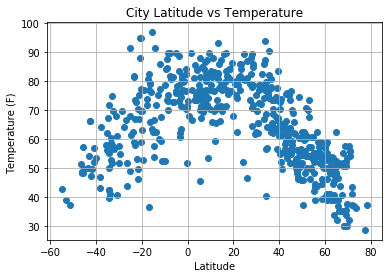

In [12]:
# plot latitude vs temp
plt.scatter(lat_data, temp_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_temp.png")
plt.show()

* This graph shows us a trend with latitude and temperature. As expected, the closer you are to the equator, the higher the temperature gets. 

#### Latitude vs. Humidity Plot

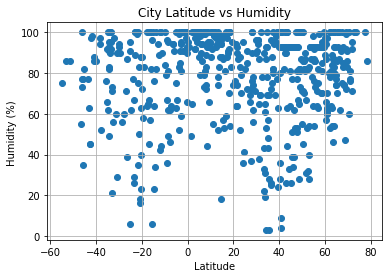

In [13]:
# plot latitude vs humidity
plt.scatter(lat_data, humid_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_humid.png")
plt.show()

* From this graph, we can observe that humidity is relatively equal in all parts of the world. This means that latitude does not effect humidity. We can see however that the humidy is quite high and this might be due to the summer season.

#### Latitude vs. Cloudiness Plot

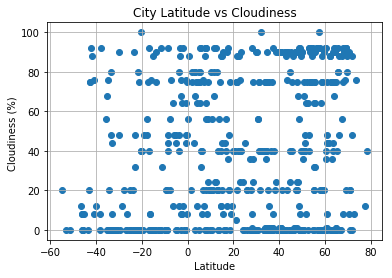

In [14]:
# plot latitude vs cloudiness
plt.scatter(lat_data, cloud_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_cloud.png")
plt.show()

* Similarly to humidity, we don't see a big difference between cloudiness and latitude. 

#### Latitude vs. Wind Speed Plot

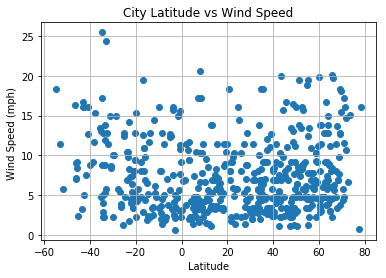

In [15]:
# plot latitude vs windspeed
plt.scatter(lat_data, wind_data, marker='o' )

# adding chart elements
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph) ")
plt.xlabel("Latitude")
plt.grid(True)

# save fig as png
plt.savefig("lat_vs_wind.png")
plt.show()

* Wind speeds are relatively the same throughout the majority of the latitudes. However, there is a subtle increase in wind speeds near the equator compared to the poles.